In [1]:
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import re
import csv

In [2]:
df = pd.read_csv('opinions.csv', delimiter=',')

In [4]:
df.head(5)

,id,id_apps,training,sentiment,content,cat_training,cat_results,preprocessing,id_object,arr_word,arr_counted,arr_group,role_group,create_at
0,1,0,0,0,"@ gojekindonesia halo, 2 hari lalu sy ada orde...",1,penumpang,"['gojekindonesia', ',', 'order', 'go', 'mart',...",1,"gojekindonesia|1|1.0;,|6|0.0;order|1|0.0;go|2|...",x;x;l;lxx;x;ss;x;x;x;x;x;x;x;x;x;s,0;0;0;1.0;0;-1.0;0;0;0;0;0;0;0;0;0;0.0,"[[null, {""word"": ""order"", ""type"": 1, ""value"": ...",15/10/2018 8:00
1,2,0,-1,-1,"Dear @ gojekindonesia, Tolong infokan ke saya ...",2,harga,"['dear', 'gojekindonesia', ',', 'tolong', 'inf...",1,"dear|1|0.0;gojekindonesia|1|1.0;,|6|0.0;tolong...",x;x;x;s;x;x;x;lxx;l;lxx;x;l;lxx;l;x;s;s;x;x;x;...,0;0;0;0.0;0;0;0;1;0;-1;0;0;-1.0;0;0;0.0;0.0;0;...,"[[null, null, {""word"": ""tolong"", ""type"": 2, ""v...",15/10/2018 8:00
2,3,0,-1,0,Seharian ini dari 4x pake jasa Go-Food dan Go-...,3,driver,"['seharian', 'pake', 'jasa', 'go', 'food', 'go...",1,seharian|unknown|0;pake|2|0.0;jasa|1|0.0;go|2|...,x;lxx;l;lxx;x;s;x;x;x;x;x;l;lxx;l;x;x;x;x;s;x;...,0;0.0;0;1.0;0;1.0;0;0;0;0;0;0;-1;0;0;0;0;0;-1....,"[[null, null, {""word"": ""pake"", ""type"": 2, ""val...",15/10/2018 8:00
3,4,0,-1,1,Kordini kan kita juga penguna jalan buka gojek...,3,perusahaan,"['kordini', 'kan', 'penguna', 'jalan', 'buka',...",1,kordini|unknown|0;kan|1|1.0;penguna|unknown|0;...,x;x;x;l;lxx;l;lxx;lxx;l;x;x;x;x;x,0;0;0;0;1.0;0;1.0;0.0;0;0;0;0;0;0,"[[null, {""word"": ""jalan"", ""type"": 1, ""value"": ...",15/10/2018 8:00
4,5,0,-1,-1,Saya driver gocar 0858 8206 2108 tgl 15/8 jam ...,4,driver,"['driver', 'gocar', 'tgl', 'jam', 'telepon', '...",1,driver|1|0.0;gocar|unknown|0;tgl|1|-1.0;jam|1|...,x;x;x;x;x;x;x;s;x;x;x;ss;x;s;l;lxx;x;x;x,0;0;0;0;0;0;0;0.0;0;0;0;-1.0;0;-1.0;0;-1.0;0;0;0,"[[null, null, {""word"": ""transfer"", ""type"": 2, ...",15/10/2018 8:00


In [5]:
df.shape

(3966, 14)

In [6]:
df['sentiment'].value_counts()

-1    1494
 1    1325
 0    1147
Name: sentiment, dtype: int64

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

In [7]:
# g = sns.FacetGrid(df, col='cat_results')
# g.map(plt.hist, 'sentiment', bins=20)

In [8]:
def processTweet(tweet):
    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    tweet = re.sub('\.+','.',tweet);
    tweet = re.sub('\,+',',',tweet);
    tweet = re.sub('\"+','"',tweet); #Remove tanda ""
    tweet = tweet.replace("/ ","/");
    tweet = tweet.replace("www. ","www.");
    tweet = re.sub(r'RT', '', tweet);
    tweet = re.sub(r'http\S+', '', tweet, flags=re.MULTILINE);
    tweet = re.sub(r'@([A-Za-z0-9_]+)', '', tweet, flags=re.MULTILINE);
    tweet = re.sub(r'pic.twitter.com/\S+', '', tweet, flags=re.MULTILINE);
    tweet = tweet.replace("?"," ? ");
    tweet = tweet.replace("-"," ");
    tweet = tweet.replace("/"," ");
    tweet = tweet.replace("["," ");
    tweet = tweet.replace("]"," ");
    tweet = tweet.replace("."," ");
    tweet = tweet.replace(","," ");
    tweet = re.sub(r'[^a-z0-9.,?# -]', ' ', tweet, flags = re.IGNORECASE|re.MULTILINE)
    tweet = re.sub(" \d+", " ", tweet)
    tweet = re.sub(r'( +)', ' ', tweet, flags = re.IGNORECASE|re.MULTILINE)
    tweet = tweet.strip('\'"')
    return tweet

In [9]:
def translator(tweet): #start replace singkatan/kata alay
    j = 0
    for kata in tweet:
        with open('data/singkatan.txt', 'r') as csvfile:
            dataFromFile = csv.reader(csvfile, delimiter="=") # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            for row in dataFromFile:
                if kata == row[0]: # Check if selected word matches short forms[LHS] in text file.
                    tweet[j] = row[1] # If match found replace it with its appropriate phrase in text file.
            csvfile.close()
        j = j + 1
    return tweet    
#end process

In [10]:
for i, data in df.iterrows():
    new = processTweet(data['preprocessing'])
    df.at[i,'preprocessing'] = new

In [11]:
train_pos = df[df['sentiment'] == 1]
train_pos = train_pos['preprocessing']
train_neg = df[df['sentiment'] == -1]
train_neg = train_neg['preprocessing']
train_neu = df[df['sentiment'] == 0]
train_neu = train_neu['preprocessing']

Positive words cloud


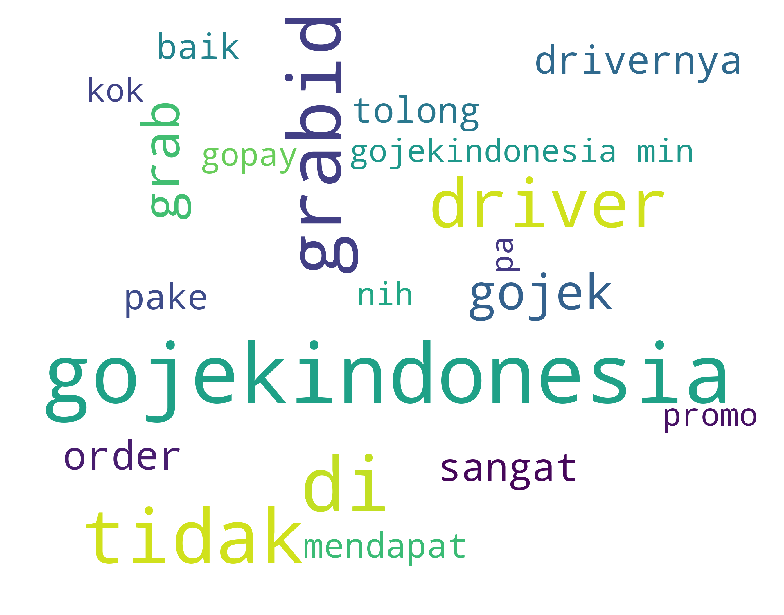

Negative words cloud


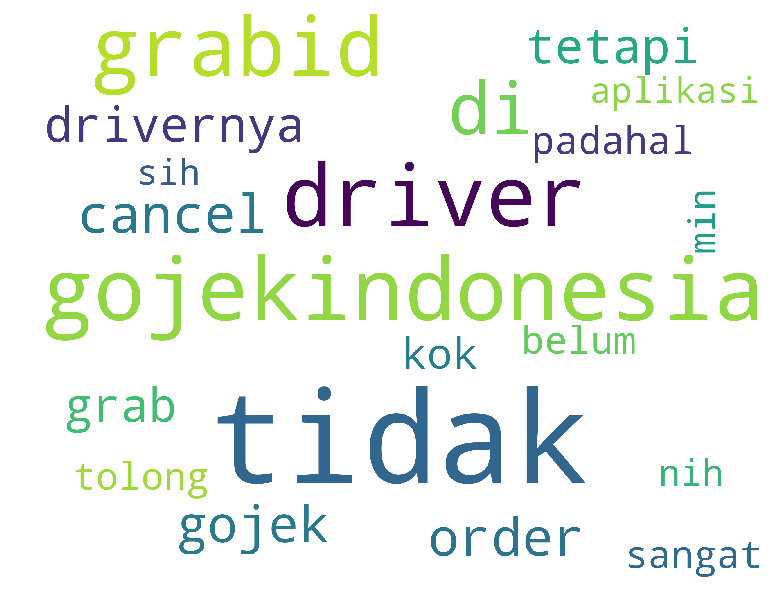

In [12]:
def draw_wordcloud(data, color = 'black'):
    words=' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                         background_color=color,
                         width=2500,
                          max_words=20,
                         height=2000
                         ).generate(cleaned_word)
    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print('Positive words cloud')
draw_wordcloud(train_pos, 'white')
print('Negative words cloud')
draw_wordcloud(train_neg, 'white')

In [13]:
pos_train_driver = df[(df['cat_results'] == 'driver' ) & (df['sentiment']==1)]
pos_train_driver = pos_train_driver['preprocessing']
neg_train_driver = df[(df['cat_results'] == 'driver') & (df['sentiment']==-1)]
neg_train_driver = neg_train_driver['preprocessing']

pos_train_penumpang = df[(df['cat_results'] == 'penumpang') & (df['sentiment']==1)]
pos_train_penumpang = pos_train_penumpang['preprocessing']
neg_train_penumpang = df[(df['cat_results'] == 'penumpang') & (df['sentiment']==-1)]
neg_train_penumpang = neg_train_penumpang['preprocessing']

# Word Cloud Negatif Driver

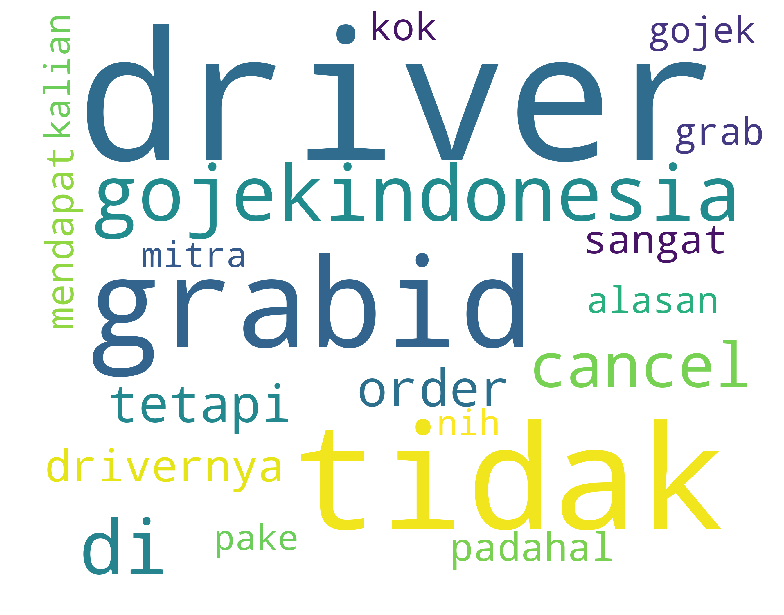

In [14]:
draw_wordcloud(neg_train_driver, 'white')

# Word Cloud Positif Driver

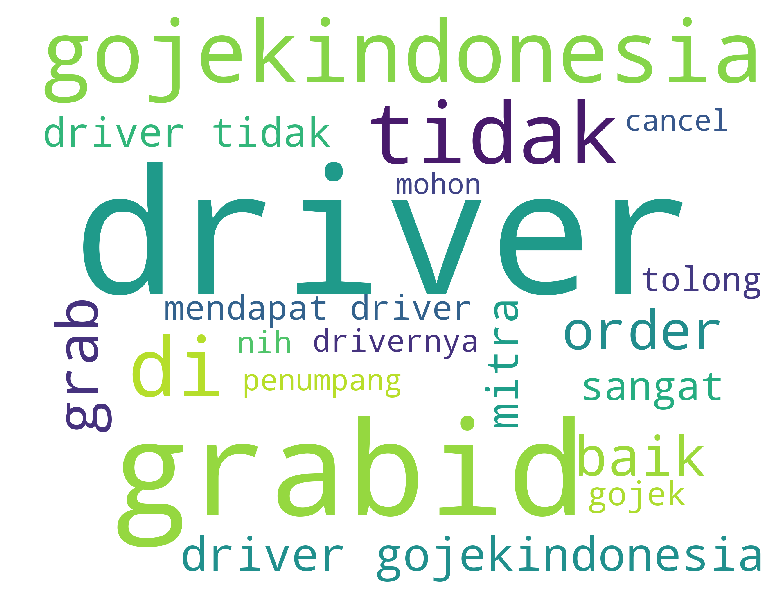

In [15]:
draw_wordcloud(pos_train_driver, 'white')

# Word Cloud Negatif Penumpang

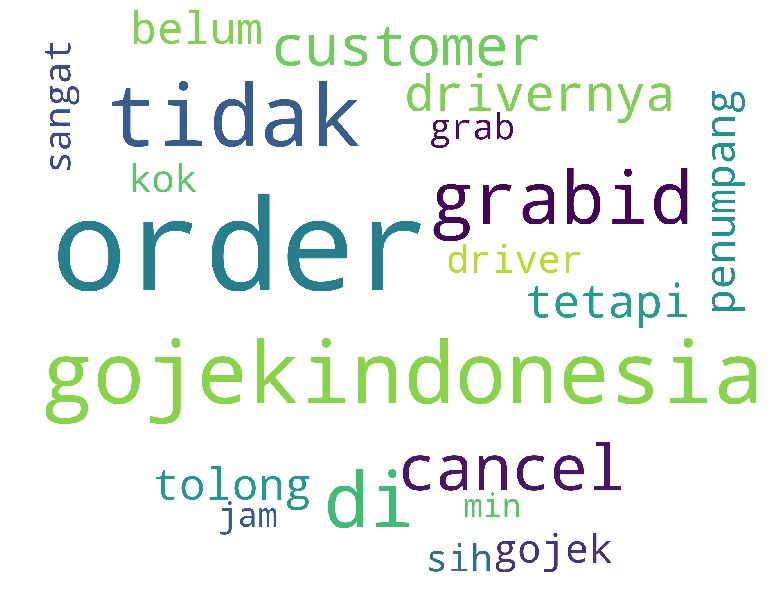

In [16]:
draw_wordcloud(neg_train_penumpang, 'white')

# Word Cloud Positif Penumpang

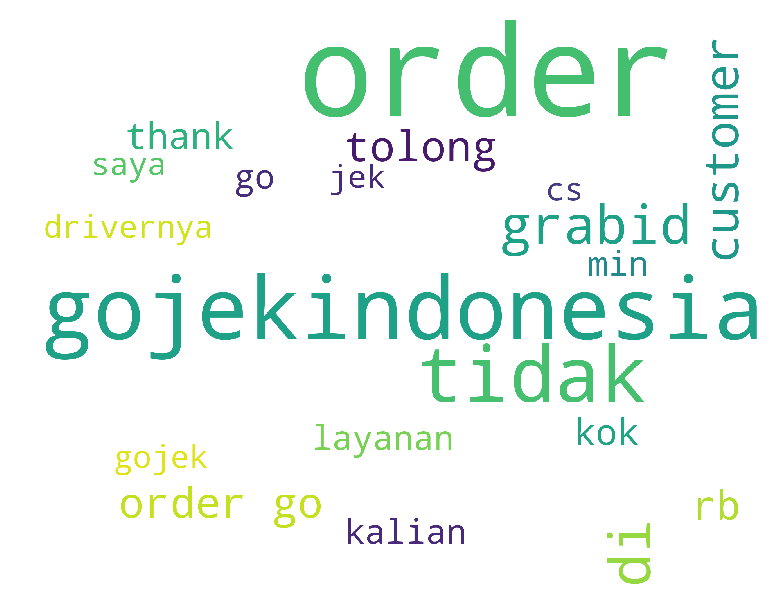

In [17]:
draw_wordcloud(pos_train_penumpang, 'white')